In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

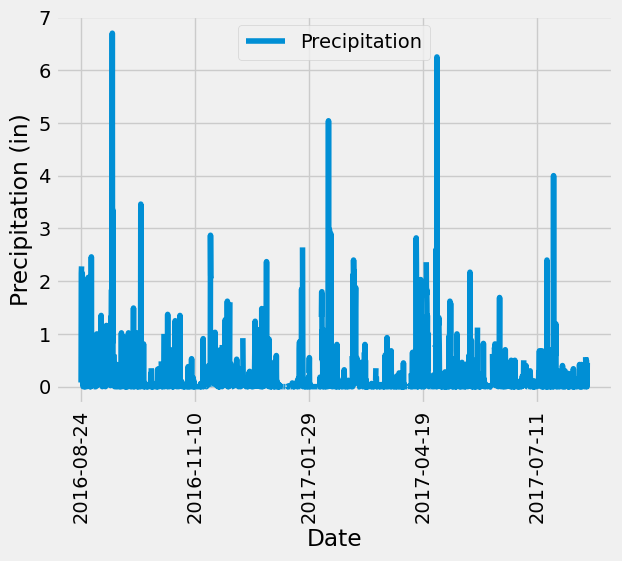

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.



# Calculate the date one year from the last date in data set.
one_yr_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_yr_query = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > one_yr_before).\
            order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
columns = ['Date', 'Precipitation']
one_yr_df = pd.DataFrame(one_yr_query, columns = columns)

# Sort the dataframe by date
one_yr_df = one_yr_df.sort_values(by='Date')


# Use Pandas Plotting with Matplotlib to plot the data
one_yr_df.plot(x='Date', y='Precipitation', rot=90)
plt.ylabel('Precipitation (in)')
plt.show()



In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats = one_yr_df['Precipitation'].describe()
stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(Measurement.station, func.count().label('station_count')).\
                group_by(Measurement.station).order_by(func.count().desc()).all()

station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs).label('min_temp'), \
             func.max(Measurement.tobs).label('max_temp'), \
             func.avg(Measurement.tobs).label('avg_temp')).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

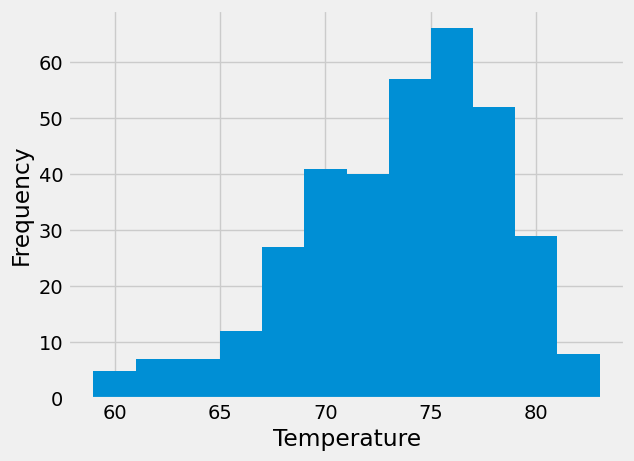

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_yr_query_st = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
            filter(Measurement.date > one_yr_before).\
            filter(Measurement.station == 'USC00519281').\
            order_by(Measurement.date).all()

columns = ['Date', 'Temperature', 'Station']
one_yr_station_df = pd.DataFrame(one_yr_query_st, columns=columns)

one_yr_station_df['Temperature'].plot(kind='hist', bins=12)
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()
